In [160]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import os

In [161]:
#Directory to save the data
os.chdir('C:/Users/claud/Documents/')

In [162]:
#obtener tuits que digan viva mexico
# Create list to append tweet data to
tweets_list1 = []

# Using TwitterSearchScraper to scrape
# data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('viva mexico since:2022-09-15 until:2022-09-16').get_items()):
    if i>10000:
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.user.username])

In [163]:
#Crear dataframe
# Creating a dataframe from the tweets list above
tweets_df1 = pd.DataFrame(tweets_list1, columns=['datetime', 'tweet_id', 'text', 'username'])

In [164]:
tweets_df1.sort_values(by=['datetime'], inplace=True)

In [165]:
tweets_df1

,datetime,tweet_id,text,username
10000,2022-09-15 19:50:20+00:00,1570500284258091009,"Estoy feliz, no porque tenga ya 99 seguidores,...",Q_Mria
9999,2022-09-15 19:50:21+00:00,1570500285709307906,Viva México cabrones...!!!\n🇲🇽 https://t.co/Ti...,RicardoSanilas
9998,2022-09-15 19:50:22+00:00,1570500289685520385,Tengan un excelente día y siempre recuerden co...,Q_Mria
9997,2022-09-15 19:50:23+00:00,1570500296786464769,"De humilde cuna, caudillo insurgente, hombre a...",Conacyt_MX
9995,2022-09-15 19:50:25+00:00,1570500305158275073,"viva México, los tacos, el tequila, los corrid...",chaack_sr
...,...,...,...,...
4,2022-09-15 23:59:53+00:00,1570563084443611140,@gambetita2020 ¡Viva México! ¡Viva Cruz Azul! ...,noxarcana3
3,2022-09-15 23:59:54+00:00,1570563090059755521,@agustdlvs gpi 🙈,jminiepetit
2,2022-09-15 23:59:55+00:00,1570563093335527426,"@Fercoca No hombre es lo más natural, salud!! ...",raespi
1,2022-09-15 23:59:56+00:00,1570563097173303296,@FelipeCalderon @HugoChappaloni Padrísimo!!! F...,YHOpinion


In [166]:
#definir stopwords
# Create list of stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('spanish')
#Extender stopwords
palabras=["q", "p","m","si"]
stop_words.extend(palabras)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\claud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [167]:
#limpiar tuits
# Remove retweets
tweets_df1 = tweets_df1[~tweets_df1['text'].str.startswith('RT')]
# Remove tweets with links
tweets_df1 = tweets_df1[~tweets_df1['text'].str.contains('http')]
# Remove tweets with mentions
tweets_df1 = tweets_df1[~tweets_df1['text'].str.contains('@')]
# Remove tweets with hashtags
tweets_df1 = tweets_df1[~tweets_df1['text'].str.contains('#')]
#dejar tuits en minusculas
# Convert to lowercase
tweets_df1['text'] = tweets_df1['text'].str.lower()
# Remove punctuation
tweets_df1['text'] = tweets_df1['text'].str.replace('[^\w\s]','')
# Remove numbers
tweets_df1['text'] = tweets_df1['text'].str.replace('\d+', '')
# Remove whitespace
tweets_df1['text'] = tweets_df1['text'].str.strip()
# Remove stopwords
tweets_df1['text'] = tweets_df1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#Remove accents
tweets_df1['text'] = tweets_df1['text'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

C:\Users\claud\AppData\Local\Temp\ipykernel_15116\3417027978.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df1['text'] = tweets_df1['text'].str.replace('[^\w\s]','')
C:\Users\claud\AppData\Local\Temp\ipykernel_15116\3417027978.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df1['text'] = tweets_df1['text'].str.replace('\d+', '')


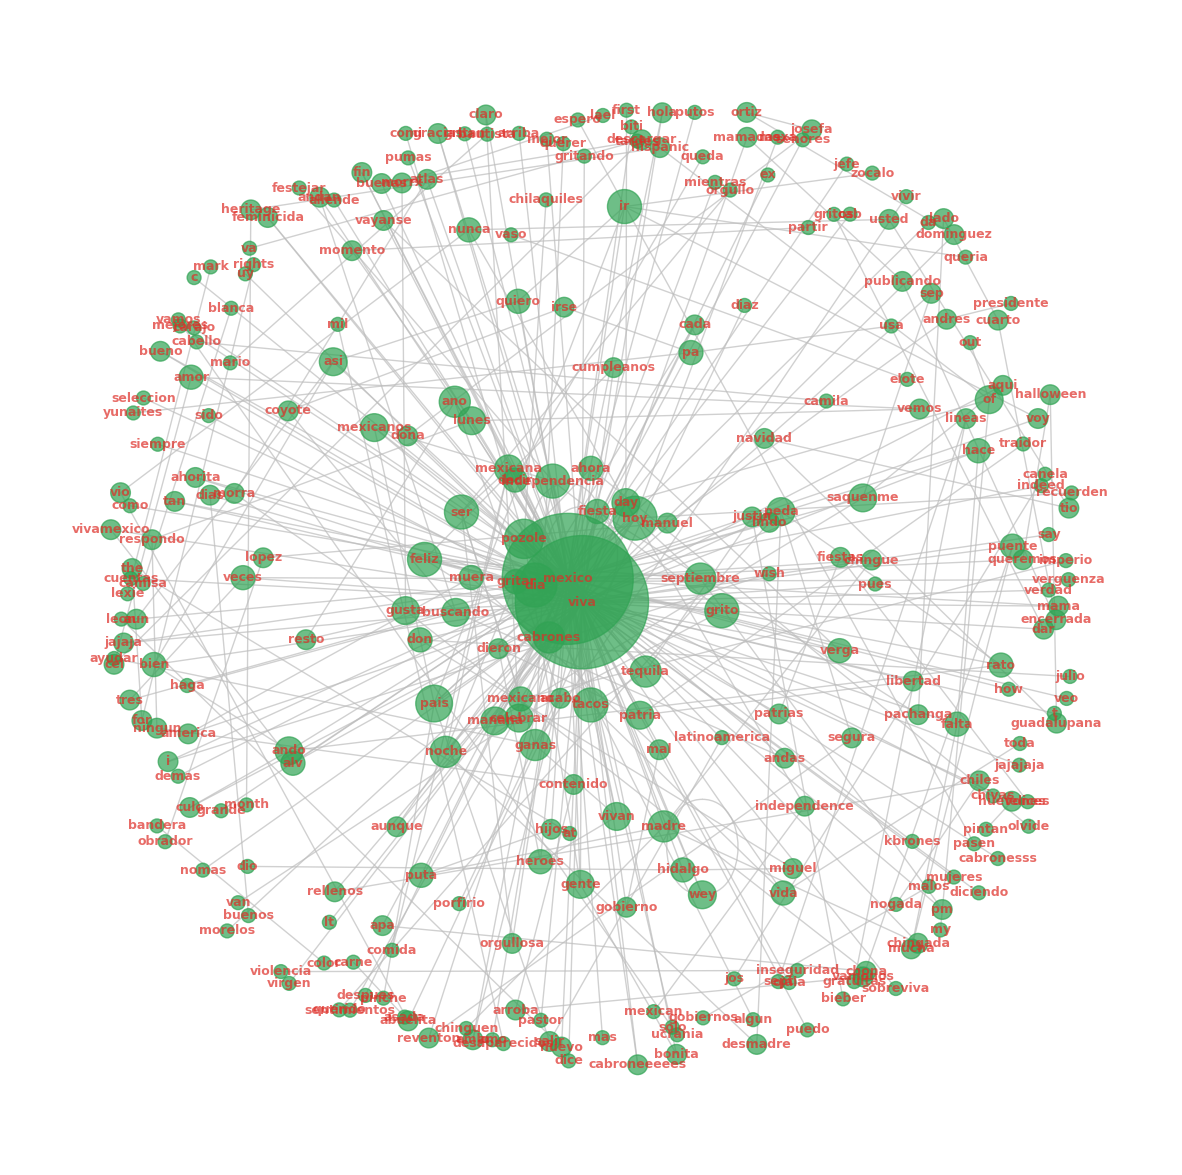

In [183]:
#Crear gráfico de asociaciones de palabras

# Create list of bigrams
from nltk.util import ngrams
bigrams = ngrams(tweets_df1['text'].str.split().sum(), 2)


# Create frequency distribution of bigrams
from nltk import FreqDist
bigram_freq = FreqDist(bigrams)
# Create dataframe of bigrams and their frequencies
bigram_df = pd.DataFrame(bigram_freq.most_common(400),
                                columns=['bigram', 'frequency'])
# Create dictionary of bigrams and their frequencies
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot with nodes sized by frequency
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Montserrat"
G = nx.Graph()
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=2)
sizes = [G.degree(n) * 100 for n in G]
nx.draw_networkx(G, pos, node_size=sizes, 
node_color='#31a354',
with_labels=True, font_size=9, font_color='#de2d26',
#Line color of edges
edge_color='#bdbdbd',
font_weight='bold', alpha=0.7)
plt.axis('off')
#salvar gráfico
plt.savefig('viva_mexico.png', dpi=300, bbox_inches='tight')
plt.show()